In [33]:
# %load common.py
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt

import statsmodels.api as sm

import seaborn as sns

%matplotlib inline

def ols(y, x):
    return sm.OLS(y, sm.add_constant(x)).fit()

def load_autos_dataset():
    auto = pd.read_csv('./data/Auto.csv', na_values='?', index_col='name')
    auto = auto.dropna()
    return auto

def load_boston_dataset():
    rdataset = sm.datasets.get_rdataset('Boston', 'MASS', True)
    return rdataset.data

def load_carseats_dataset():
    return pd.read_csv('./data/Carseats.csv', index_col=0)

In [3]:
Default = pd.read_excel('./data/Default.xlsx')

In [4]:
Default.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [5]:
Default.shape

(10000, 4)

In [19]:
subset = Default.sample(frac=0.3)

In [21]:
grouped = subset.groupby('default')

In [42]:
sns.set_style('white')

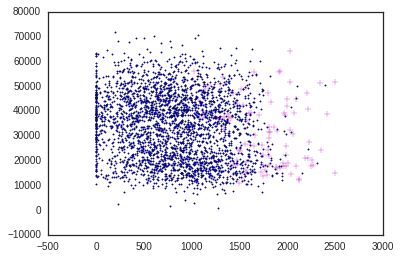

In [44]:
yes_group = grouped.get_group('Yes')
no_group = grouped.get_group('No')
plt.scatter(yes_group['balance'], yes_group['income'], s=40, c='m', marker='+')
plt.scatter(no_group['balance'], no_group['income'], s=2, c='b', marker='o')

,default,student,balance,income
1833,Yes,Yes,1790.360537,14306.823602
7814,Yes,No,1598.020831,39163.361056
4431,Yes,Yes,1926.371583,17012.438144
3298,Yes,Yes,2124.489239,12651.074319
2284,Yes,No,2023.733603,32094.627806
3970,Yes,Yes,1803.944567,29100.819225
1210,Yes,Yes,1507.333948,23898.878235
5575,Yes,No,1801.801183,24152.264834
9814,Yes,No,1975.653028,38221.839745
1497,Yes,No,2074.807589,38988.859245
